In [1]:
import xarray as xr
import numpy as np
import glob
import json

%matplotlib inline

In [5]:
directory = '../testing/'
filenames = [filename.split('/')[-1].split('.')[-2:] for filename in glob.glob(directory + '*.tif')]
arrs = {file: xr.open_rasterio(f'{directory}{file}.{ext}') for file, ext in filenames}
ds = xr.Dataset(arrs)
ds

<xarray.Dataset>
Dimensions:  (band: 16, x: 512, y: 512)
Coordinates:
  * band     (band) int64 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16
  * y        (y) float64 47.73 47.73 47.73 47.73 ... 47.68 47.68 47.68 47.68
  * x        (x) float64 16.45 16.45 16.45 16.45 16.45 ... 16.5 16.5 16.5 16.5
Data variables:
    NDVI     (band, y, x) uint16 ...
    B03      (band, y, x) uint16 ...
    B08      (band, y, x) uint16 ...
    B04      (band, y, x) uint16 ...

In [6]:
ds = ds.rename({'band': 'time', 'y': 'lat', 'x': 'lon'})
with open(f'{directory}userdata.json') as f:
    userdata = json.load(f)
    ds.coords['time'] = [np.datetime64(t) for t in userdata['time']]

# ds.coords['time']
ds

<xarray.Dataset>
Dimensions:  (lat: 512, lon: 512, time: 16)
Coordinates:
  * time     (time) datetime64[ns] 2018-01-01T11:59:59.500000 ... 2018-09-08T11:59:59.500000
  * lat      (lat) float64 47.73 47.73 47.73 47.73 ... 47.68 47.68 47.68 47.68
  * lon      (lon) float64 16.45 16.45 16.45 16.45 16.45 ... 16.5 16.5 16.5 16.5
Data variables:
    NDVI     (time, lat, lon) uint16 ...
    B03      (time, lat, lon) uint16 ...
    B08      (time, lat, lon) uint16 ...
    B04      (time, lat, lon) uint16 ...

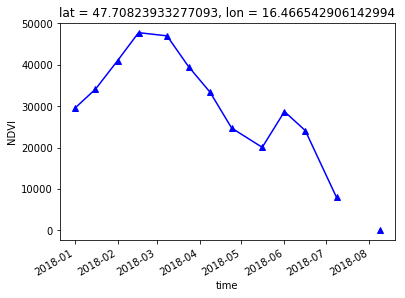

In [27]:
ds.isel(lat=200, lon=200)
da.where(da.NDVI > 0).NDVI.plot.line('b-^')